# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm



# 1. Education Dataset

In [2]:
#df = pd.read_csv("The Global Dataset 14 Apr 2020.csv",sep=';')
#df = pd.read_excel("education.xlsx")
education = pd.read_csv("..//data/access_to_education_index.csv",sep=';')#, dtype={"2013": float})
education.dtypes

HDI Rank    float64
Country      object
1980         object
1985         object
1990         object
1995         object
2000         object
2005         object
2006         object
2007         object
2008         object
2009         object
2010         object
2011         object
2012         object
2013         object
dtype: object

In [3]:
education.head()

,HDI Rank,Country,1980,1985,1990,1995,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,169.0,Afghanistan,"0,0761","0,103083333","0,121388889","0,175288889","0,225522222","0,2974","0,308986667","0,320573333","0,33216","0,343746667","0,357","0,365333333","0,365333333","0,365333333"
1,95.0,Albania,"0,540588889","0,527776677","0,537186688","0,528693858","0,565465051","0,59467023","0,596323054","0,597975879","0,599628703","0,600651723","0,601674743","0,608519363","0,608519363","0,608519363"
2,93.0,Algeria,"0,321377778","0,347177778","0,382388889","0,424366667","0,493488889","0,562566667","0,570237778","0,580686667","0,59808","0,615473333","0,631477778","0,642588889","0,642588889","0,642588889"
3,37.0,Andorra,..,..,..,..,..,..,..,..,..,..,"0,670286667","0,670286667","0,670286667","0,670286667"
4,149.0,Angola,..,..,..,..,"0,298712356","0,364684578","0,379923409","0,39516224","0,410401071","0,425639902","0,440878733","0,474212067","0,474212067","0,474212067"


In [4]:
education=education.replace("..", np.nan)
education

,HDI Rank,Country,1980,1985,1990,1995,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,169.0,Afghanistan,"0,0761","0,103083333","0,121388889","0,175288889","0,225522222","0,2974","0,308986667","0,320573333","0,33216","0,343746667","0,357","0,365333333","0,365333333","0,365333333"
1,95.0,Albania,"0,540588889","0,527776677","0,537186688","0,528693858","0,565465051","0,59467023","0,596323054","0,597975879","0,599628703","0,600651723","0,601674743","0,608519363","0,608519363","0,608519363"
2,93.0,Algeria,"0,321377778","0,347177778","0,382388889","0,424366667","0,493488889","0,562566667","0,570237778","0,580686667","0,59808","0,615473333","0,631477778","0,642588889","0,642588889","0,642588889"
3,37.0,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,670286667","0,670286667","0,670286667","0,670286667"
4,149.0,Angola,NaN,NaN,NaN,NaN,"0,298712356","0,364684578","0,379923409","0,39516224","0,410401071","0,425639902","0,440878733","0,474212067","0,474212067","0,474212067"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,67.0,Venezuela (Bolivarian Republic of),"0,440501111","0,46065","0,452946667","0,474984444","0,513254544","0,594450532","0,617965815","0,649559434","0,670028665","0,67421609","0,682482617","0,682482617","0,682482617","0,682482617"
191,121.0,Vietnam,"0,381288889","0,375522222","0,349122222","0,387388889","0,434455556","0,470388889","0,478175556","0,485962222","0,493748889","0,501535556","0,509322222","0,513488889","0,513488889","0,513488889"
192,154.0,Yemen,NaN,NaN,"0,218431389","0,229298056","0,257438889","0,304011111","0,306979259","0,309947407","0,312915556","0,320513333","0,328111111","0,339222222","0,339222222","0,339222222"
193,141.0,Zambia,"0,318833333","0,361711111","0,375477778","0,457097917","0,487518056","0,537804861","0,545682222","0,553559583","0,561436944","0,569314306","0,577191667","0,584262361","0,591333333","0,591333333"


# 1.2 New Data Frame with selected columns

In [5]:
newdf= education[["Country","2013"]].copy()
newdf= newdf.replace("..", np.nan)
newdf.dropna(inplace=True)

newdf= newdf.stack().str.replace(',','.').unstack()
print(newdf, newdf.dtypes)

                                Country         2013
0                           Afghanistan  0.365333333
1                               Albania  0.608519363
2                               Algeria  0.642588889
3                               Andorra  0.670286667
4                                Angola  0.474212067
..                                  ...          ...
190  Venezuela (Bolivarian Republic of)  0.682482617
191                             Vietnam  0.513488889
192                               Yemen  0.339222222
193                              Zambia  0.591333333
194                            Zimbabwe  0.499933333

[187 rows x 2 columns] Country    object
2013       object
dtype: object


In [6]:
#newdf["2013"].astype(float)
newdf=newdf.astype({"2013" :float})
newdf.dtypes

Country     object
2013       float64
dtype: object

In [7]:
#Rename Column
newdf.rename(columns={"2013": "Education_Access_Score"}, inplace=True)


In [8]:
newdf["Education_Access_Score"] = pd.to_numeric(newdf["Education_Access_Score"])

In [9]:
newdf.dtypes

Country                    object
Education_Access_Score    float64
dtype: object

# Slavery Index Dataset

In [10]:
slavery_index = pd.read_csv("..//Data/clean_slavery_index.csv", header=1)

slavery_index.head(3)
#print(slavery_index.isnull().sum())

,Country,"Population \n(from United Nations Population Division, World Population Prospects)",Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating
0,"Korea, Democratic People's Republic of","25,244,000",Asia and the Pacific,104.6,"2,640,000",87.6,52.0,30.3,32.4,12.3,...,-1.0,-1.0,0.3,4.8,0.0,0.0,0.4,-2.0,-5.6,D
1,Eritrea,"4,847,000",Africa,93.0,"451,000",71.0,50.6,33.7,48.1,25.9,...,-1.0,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D
2,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C


# Remove white space at the end of string

In [11]:
slavery_index.columns = slavery_index.columns.str.strip()
slavery_index.columns

Index(['Country',
       'Population \n(from United Nations Population Division, World Population Prospects)',
       'Region',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues', 'Factor Two Nourishment and Access',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating'],
      dtype='object')

In [12]:
slavery_index.dtypes

Country                                                                                object
Population \n(from United Nations Population Division, World Population Prospects)     object
Region                                                                                 object
Est. prevalence of population in modern slavery (victims per 1,000 population)        float64
Est. number of people in modern slavery                                                object
Factor One Governance Issues                                                          float64
Factor Two Nourishment and Access                                                     float64
Factor Three Inequality                                                               float64
Factor Four Disenfranchised Groups                                                    float64
Factor Five Effects of Conflict                                                       float64
Final overall (normalised, weighted) vulnerability score    

# Rename column

In [13]:
slavery_index.rename(columns={"Est. prevalence of population in modern slavery (victims per 1,000 population)": "Victims_per_1000_population"}, inplace=True)

In [14]:
slavery_index.rename(columns={"Population \n(from United Nations Population Division, World Population Prospects)": "total_population"}, inplace=True)

In [15]:
slavery_index.columns

Index(['Country', 'total_population', 'Region', 'Victims_per_1000_population',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues', 'Factor Two Nourishment and Access',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating'],
      dtype='object')

In [16]:
#slavery_index.dtypes

In [17]:
#slavery_index

In [18]:
#slavery_index["Est. number of people in modern slavery"] = pd.to_numeric(slavery_index["Est. number of people in modern slavery"])

In [19]:
#slavery_index.loc[pd.to_numeric(slavery_index["Est. number of people in modern slavery"], errors='coerce').isnull()]

# Merge `Slavery Index` with `Education` table

In [20]:
merged= pd.merge(slavery_index, newdf, on="Country" )
merged

,Country,total_population,Region,Victims_per_1000_population,Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,Education_Access_Score
0,Eritrea,"4,847,000",Africa,93.0,"451,000",71.0,50.6,33.7,48.1,25.9,...,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D,0.227514
1,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,0.370089
2,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,0.317867
3,Afghanistan,"33,736,000",Asia and the Pacific,22.2,"749,000",81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365333
4,Mauritania,"4,182,000",Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,0.352278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Saint Lucia,"177,000",Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.631431
164,Malta,"428,000",Europe and Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.732538
165,Saint Vincent and the Grenadines,"109,000",Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.656834
166,Vanuatu,"265,000",Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595511


In [21]:
merged.head(5)

,Country,total_population,Region,Victims_per_1000_population,Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,Education_Access_Score
0,Eritrea,"4,847,000",Africa,93.0,"451,000",71.0,50.6,33.7,48.1,25.9,...,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D,0.227514
1,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,0.370089
2,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,0.317867
3,Afghanistan,"33,736,000",Asia and the Pacific,22.2,"749,000",81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365333
4,Mauritania,"4,182,000",Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,0.352278


In [22]:
merged.corr()

,Victims_per_1000_population,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,"Final overall (normalised, weighted) vulnerability score",Support survivors,%,Criminal justice,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Education_Access_Score
Victims_per_1000_population,1.000000,0.379444,0.423225,0.111686,0.294802,0.197003,0.406846,-0.377257,-0.376439,-0.392226,...,-0.234737,-0.355021,-0.370284,-0.369202,-0.159504,-0.157498,-0.441590,-0.363597,-0.465029,-0.416617
Factor One Governance Issues,0.379444,1.000000,0.595208,0.502648,0.468657,0.460542,0.929781,-0.718463,-0.719307,-0.643288,...,-0.444631,-0.267512,-0.658122,-0.656610,-0.573796,-0.561784,-0.794816,-0.483502,-0.814466,-0.733245
Factor Two Nourishment and Access,0.423225,0.595208,1.000000,0.374382,0.416182,0.327446,0.736855,-0.481210,-0.480159,-0.439673,...,-0.345587,-0.106736,-0.523452,-0.518601,-0.395159,-0.385736,-0.563055,-0.324523,-0.575496,-0.779522
Factor Three Inequality,0.111686,0.502648,0.374382,1.000000,0.436054,0.372882,0.649680,-0.278501,-0.280180,-0.251601,...,-0.284602,0.001839,-0.182037,-0.179726,-0.318625,-0.303547,-0.298557,-0.221779,-0.312195,-0.485061
Factor Four Disenfranchised Groups,0.294802,0.468657,0.416182,0.436054,1.000000,0.232622,0.613947,-0.289656,-0.289535,-0.312353,...,-0.151045,-0.041067,-0.301425,-0.297696,-0.269741,-0.279464,-0.352921,-0.139008,-0.351394,-0.449591
Factor Five Effects of Conflict,0.197003,0.460542,0.327446,0.372882,0.232622,1.000000,0.630298,-0.211623,-0.211027,-0.147979,...,-0.360252,-0.213621,-0.254158,-0.253146,-0.217195,-0.206653,-0.228068,-0.390164,-0.268848,-0.410084
"Final overall (normalised, weighted) vulnerability score",0.406846,0.929781,0.736855,0.649680,0.613947,0.630298,1.000000,-0.651196,-0.651541,-0.585350,...,-0.471877,-0.227035,-0.622873,-0.619768,-0.551788,-0.539987,-0.729949,-0.484311,-0.754005,-0.804421
Support survivors,-0.377257,-0.718463,-0.481210,-0.278501,-0.289656,-0.211623,-0.651196,1.000000,0.999876,0.710247,...,0.315491,0.185547,0.571494,0.570977,0.423228,0.422001,0.897757,0.340910,0.890594,0.595888
%,-0.376439,-0.719307,-0.480159,-0.280180,-0.289535,-0.211027,-0.651541,0.999876,1.000000,0.710026,...,0.315203,0.183192,0.572400,0.571926,0.424052,0.422626,0.898056,0.339491,0.890667,0.596111
Criminal justice,-0.392226,-0.643288,-0.439673,-0.251601,-0.312353,-0.147979,-0.585350,0.710247,0.710026,1.000000,...,0.221510,0.231919,0.612633,0.612278,0.392304,0.390696,0.863833,0.290865,0.852355,0.544045


# Plots

## Scatter plot

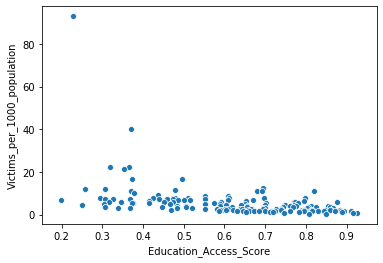

In [23]:
ax = sns.scatterplot(data=merged,
                x="Education_Access_Score",
                y="Victims_per_1000_population");


## Regplot

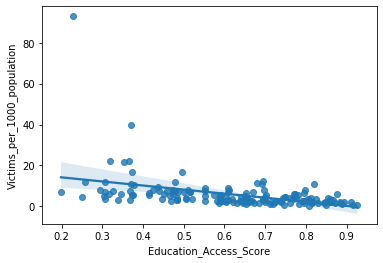

In [24]:
ax= sns.regplot(data=merged,
                x="Education_Access_Score",
                y="Victims_per_1000_population");


In [25]:
#Remove outlier

#merged.drop(merged.loc[merged["Victims_per_1000_population"] == max(merged["Victims_per_1000_population"])].index,axis=0,inplace=True)

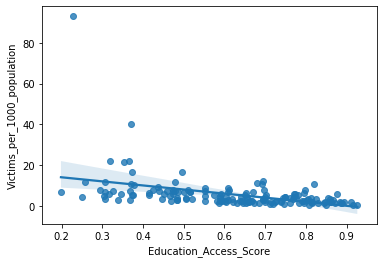

In [26]:
ax= sns.regplot(data=merged,
                x="Education_Access_Score",
                y="Victims_per_1000_population");

In [27]:
#x= merged["Education_Access_Score"]
#y= merged["Victims_per_1,000_population"]

#print("x mean:",x.mean().round(2),"y mean:", y.mean().round(2))


# Drop `null` values

In [28]:

merged_new= merged[["Education_Access_Score", "Victims_per_1000_population"]].copy()
merged_new.dropna(inplace=True)
merged_new.head()
#np.isnan(merged_new).sum()
merged_new.loc[np.isnan(merged_new["Education_Access_Score"])]

,Education_Access_Score,Victims_per_1000_population


In [29]:
merged_new.corr()

,Education_Access_Score,Victims_per_1000_population
Education_Access_Score,1.000000,-0.416617
Victims_per_1000_population,-0.416617,1.000000


#  OLS Regression Results 

In [30]:

x = sm.add_constant(merged_new.Education_Access_Score)
model = sm.OLS(merged_new.Victims_per_1000_population,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Victims_per_1000_population   R-squared:                       0.174
Model:                                     OLS   Adj. R-squared:                  0.168
Method:                          Least Squares   F-statistic:                     31.29
Date:                         Sun, 12 Jul 2020   Prob (F-statistic):           1.03e-07
Time:                                 13:57:59   Log-Likelihood:                -524.90
No. Observations:                          151   AIC:                             1054.
Df Residuals:                              149   BIC:                             1060.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

# 2nd Model

## Education dataset
### New Data Frame with `Country` and `HDI Rank` in the columns

In [31]:
hdidf= education[["Country","HDI Rank"]].copy()
hdidf= hdidf.replace("..", np.nan)
hdidf.dropna(inplace=True)

print(hdidf, hdidf.dtypes)


                                Country  HDI Rank
0                           Afghanistan     169.0
1                               Albania      95.0
2                               Algeria      93.0
3                               Andorra      37.0
4                                Angola     149.0
..                                  ...       ...
190  Venezuela (Bolivarian Republic of)      67.0
191                             Vietnam     121.0
192                               Yemen     154.0
193                              Zambia     141.0
194                            Zimbabwe     156.0

[187 rows x 2 columns] Country      object
HDI Rank    float64
dtype: object


In [32]:
hdidf.rename(columns={"HDI Rank": "HDI_Rank"}, inplace=True)

# Merging Tables

## `slavery_index` table with `hdidf` table

In [33]:
merge_2= pd.merge(slavery_index, hdidf, on="Country" )
merge_2

,Country,total_population,Region,Victims_per_1000_population,Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,HDI_Rank
0,Eritrea,"4,847,000",Africa,93.0,"451,000",71.0,50.6,33.7,48.1,25.9,...,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D,182.0
1,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,180.0
2,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,185.0
3,Afghanistan,"33,736,000",Asia and the Pacific,22.2,"749,000",81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
4,Mauritania,"4,182,000",Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Saint Lucia,"177,000",Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0
164,Malta,"428,000",Europe and Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
165,Saint Vincent and the Grenadines,"109,000",Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0
166,Vanuatu,"265,000",Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0


# Correlations between `merge_2` table

In [34]:
merge_2.corr()

,Victims_per_1000_population,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,"Final overall (normalised, weighted) vulnerability score",Support survivors,%,Criminal justice,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,HDI_Rank
Victims_per_1000_population,1.000000,0.379444,0.423225,0.111686,0.294802,0.197003,0.406846,-0.377257,-0.376439,-0.392226,...,-0.234737,-0.355021,-0.370284,-0.369202,-0.159504,-0.157498,-0.441590,-0.363597,-0.465029,0.393452
Factor One Governance Issues,0.379444,1.000000,0.595208,0.502648,0.468657,0.460542,0.929781,-0.718463,-0.719307,-0.643288,...,-0.444631,-0.267512,-0.658122,-0.656610,-0.573796,-0.561784,-0.794816,-0.483502,-0.814466,0.748468
Factor Two Nourishment and Access,0.423225,0.595208,1.000000,0.374382,0.416182,0.327446,0.736855,-0.481210,-0.480159,-0.439673,...,-0.345587,-0.106736,-0.523452,-0.518601,-0.395159,-0.385736,-0.563055,-0.324523,-0.575496,0.816940
Factor Three Inequality,0.111686,0.502648,0.374382,1.000000,0.436054,0.372882,0.649680,-0.278501,-0.280180,-0.251601,...,-0.284602,0.001839,-0.182037,-0.179726,-0.318625,-0.303547,-0.298557,-0.221779,-0.312195,0.534871
Factor Four Disenfranchised Groups,0.294802,0.468657,0.416182,0.436054,1.000000,0.232622,0.613947,-0.289656,-0.289535,-0.312353,...,-0.151045,-0.041067,-0.301425,-0.297696,-0.269741,-0.279464,-0.352921,-0.139008,-0.351394,0.526088
Factor Five Effects of Conflict,0.197003,0.460542,0.327446,0.372882,0.232622,1.000000,0.630298,-0.211623,-0.211027,-0.147979,...,-0.360252,-0.213621,-0.254158,-0.253146,-0.217195,-0.206653,-0.228068,-0.390164,-0.268848,0.384580
"Final overall (normalised, weighted) vulnerability score",0.406846,0.929781,0.736855,0.649680,0.613947,0.630298,1.000000,-0.651196,-0.651541,-0.585350,...,-0.471877,-0.227035,-0.622873,-0.619768,-0.551788,-0.539987,-0.729949,-0.484311,-0.754005,0.834111
Support survivors,-0.377257,-0.718463,-0.481210,-0.278501,-0.289656,-0.211623,-0.651196,1.000000,0.999876,0.710247,...,0.315491,0.185547,0.571494,0.570977,0.423228,0.422001,0.897757,0.340910,0.890594,-0.582376
%,-0.376439,-0.719307,-0.480159,-0.280180,-0.289535,-0.211027,-0.651541,0.999876,1.000000,0.710026,...,0.315203,0.183192,0.572400,0.571926,0.424052,0.422626,0.898056,0.339491,0.890667,-0.582441
Criminal justice,-0.392226,-0.643288,-0.439673,-0.251601,-0.312353,-0.147979,-0.585350,0.710247,0.710026,1.000000,...,0.221510,0.231919,0.612633,0.612278,0.392304,0.390696,0.863833,0.290865,0.852355,-0.509307


In [35]:
# Remove Outlier
#merge_2.drop(merge_2.loc[merge_2["Victims_per_1000_population"] == max(merge_2["Victims_per_1000_population"])].index,axis=0,inplace=True)

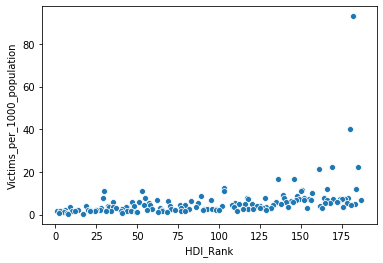

In [36]:
ax = sns.scatterplot(data=merge_2,
                x="HDI_Rank",
                y="Victims_per_1000_population");

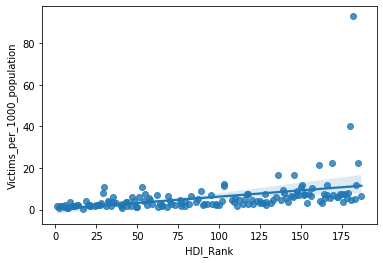

In [37]:
ax= sns.regplot(data=merge_2,
                x="HDI_Rank",
                y="Victims_per_1000_population");

In [38]:
merged_n= merge_2[["HDI_Rank", "Victims_per_1000_population"]].copy()
merged_n.dropna(inplace=True)
merged_n.head()

,HDI_Rank,Victims_per_1000_population
0,182.0,93.0
1,180.0,40.0
2,185.0,22.3
3,169.0,22.2
4,161.0,21.4


In [39]:
merged_n.corr()

,HDI_Rank,Victims_per_1000_population
HDI_Rank,1.000000,0.393452
Victims_per_1000_population,0.393452,1.000000


In [40]:
x = sm.add_constant(merged_n.HDI_Rank)
model = sm.OLS(merged_n.Victims_per_1000_population,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Victims_per_1000_population   R-squared:                       0.155
Model:                                     OLS   Adj. R-squared:                  0.149
Method:                          Least Squares   F-statistic:                     27.29
Date:                         Sun, 12 Jul 2020   Prob (F-statistic):           5.80e-07
Time:                                 13:58:01   Log-Likelihood:                -526.60
No. Observations:                          151   AIC:                             1057.
Df Residuals:                              149   BIC:                             1063.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 3rd Model

In [41]:
education_df= education[["HDI Rank","Country","2013"]].copy()
education_df= education_df.replace("..", np.nan)
education_df.dropna(inplace=True)

education_df["2013"]= education_df["2013"].str.replace(',','.')
education_df=education_df.astype({"HDI Rank":float, "2013" :float})
education_df.rename(columns={"HDI Rank": "HDI_Rank","2013": "Education_Access_Score"}, inplace=True)

education_df, education_df.dtypes

(     HDI_Rank                             Country  Education_Access_Score
 0       169.0                         Afghanistan                0.365333
 1        95.0                             Albania                0.608519
 2        93.0                             Algeria                0.642589
 3        37.0                             Andorra                0.670287
 4       149.0                              Angola                0.474212
 ..        ...                                 ...                     ...
 190      67.0  Venezuela (Bolivarian Republic of)                0.682483
 191     121.0                             Vietnam                0.513489
 192     154.0                               Yemen                0.339222
 193     141.0                              Zambia                0.591333
 194     156.0                            Zimbabwe                0.499933
 
 [187 rows x 3 columns],
 HDI_Rank                  float64
 Country                    object
 Ed

In [42]:
slavery_index.rename(columns={"Population \n(from United Nations Population Division, World Population Prospects)": "total_population"}, inplace=True)
slavery_index['total_population'] = slavery_index['total_population'].astype('str') 
slavery_index['total_population']=slavery_index['total_population'].str.replace(',','')
slavery_index=slavery_index.astype({"total_population" :float})



In [43]:
slavery_index["Est. number of people in modern slavery"] = slavery_index["Est. number of people in modern slavery"].astype('str')
slavery_index["Est. number of people in modern slavery"] = slavery_index["Est. number of people in modern slavery"].str.replace(",","")
slavery_index["Est. number of people in modern slavery"] = slavery_index["Est. number of people in modern slavery"].str.replace("<","")
slavery_index=slavery_index.astype({"Est. number of people in modern slavery" :float})
slavery_index.head(25)

,Country,total_population,Region,Victims_per_1000_population,Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating
0,"Korea, Democratic People's Republic of",25244000.0,Asia and the Pacific,104.6,2640000.0,87.6,52.0,30.3,32.4,12.3,...,-1.0,-1.0,0.3,4.8,0.0,0.0,0.4,-2.0,-5.6,D
1,Eritrea,4847000.0,Africa,93.0,451000.0,71.0,50.6,33.7,48.1,25.9,...,-1.0,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D
2,Burundi,10199000.0,Africa,40.0,408000.0,72.4,42.6,42.1,48.1,41.7,...,-1.0,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C
3,Central African Republic,4546000.0,Africa,22.3,101000.0,85.4,50.2,62.7,58.0,81.6,...,-1.0,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D
4,Afghanistan,33736000.0,Asia and the Pacific,22.2,749000.0,81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mauritania,4182000.0,Africa,21.4,90000.0,67.3,33.7,39.3,50.5,22.3,...,-1.0,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C
6,South Sudan,11882000.0,Africa,20.5,243000.0,75.7,51.1,62.9,56.1,85.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pakistan,189381000.0,Asia and the Pacific,16.8,3186000.0,56.8,36.2,45.9,55.3,92.8,...,-1.0,0.0,2.8,40.5,0.0,0.0,6.2,-1.0,18.6,C
8,Cambodia,15518000.0,Asia and the Pacific,16.8,261000.0,66.3,38.5,41.6,56.7,14.8,...,0.0,0.0,2.3,33.3,0.0,0.0,10.5,0.0,37.6,CCC
9,"Iran, Islamic Republic of",79360000.0,Asia and the Pacific,16.2,1289000.0,74.6,25.5,35.8,37.3,39.5,...,-1.0,0.0,1.7,23.8,0.0,0.0,2.9,-1.0,6.8,D


# Merge Datasets (Slavery Index, Education)

In [44]:
# merging both tables
merge_3= pd.merge(slavery_index, education_df, on="Country" )
merge_3.columns

Index(['Country', 'total_population', 'Region', 'Victims_per_1000_population',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues', 'Factor Two Nourishment and Access',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating',
       'HDI_Rank', 'Education_Access_Score'],
      dtype='object')

In [45]:
#import matplotlib.pyplot as plt
#plt.style.use('ggplot')

# histogram of the height
#education_df.Victims_per_1000_population.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
#plt.title('Distribution of Height', size=24)
#plt.xlabel('Victims_per_1000_population")', size=18)
#plt.ylabel('HDI_Rank', size=18)


In [46]:
merge_3.dropna(inplace=True)
#merge_3

# Define Regression Function

In [47]:
def run_regression(df, y_col, X_cols):
    y = df[y_col]
    X = df[X_cols]
    X = sm.add_constant(X)
    
    l = sm.OLS(y, X)
    return l.fit()

In [51]:
y_col = "Victims_per_1000_population"
run_regression(merge_3, y_col, ["Education_Access_Score", "HDI_Rank"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Victims_per_1000_population   R-squared:                       0.172
Model:                                     OLS   Adj. R-squared:                  0.160
Method:                          Least Squares   F-statistic:                     14.95
Date:                         Sun, 12 Jul 2020   Prob (F-statistic):           1.26e-06
Time:                                 13:59:09   Log-Likelihood:                -511.24
No. Observations:                          147   AIC:                             1028.
Df Residuals:                              144   BIC:                             1037.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     19.5619     10.017      1.953      0.053      -0.238      39.362
Education_Access_Score   -21.5246     11.075     -1.944      0.054     -43.415       0.366
HDI_Rank                  -0.0053      0.035     -0.150      0.881      -0.075       0.064
==============================================================================
Omnibus:                      245.996   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31169.051
Skew:                           7.403   Prob(JB):                         0.00
Kurtosis:                      72.783   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#reg.predict(["value for column 1", "value of column 2"])

# Load GDP Data into a new Data Frame

In [50]:
df_gdp = pd.read_csv("../data/GDP Data.csv")
df_gdp.head()

FileNotFoundError: [Errno 2] File ../data/GDP Data.csv does not exist: '../data/GDP Data.csv'

# Rename columns names

In [ ]:
df_gdp= df_gdp.rename({'Country Name' : 'Country',
               '2017' : 'gdp_2017'},axis=1)

# Drop the NaN values

In [ ]:
df_gdp_new = df_gdp[['Country', 'gdp_2017']].copy()
df_gdp_new.dropna(inplace=True)
df_gdp_new.head()

# Merge 3 Datasets (Education, Slavery Index, GDP)

In [ ]:
merge_4 = pd.merge(merge_3, df_gdp_new, on="Country", how="inner")
#merge_4.loc[2, "Final overall (normalised, weighted) vulnerability score"]


In [ ]:
merge_4['gdp_per_capita'] = merge_4.apply(lambda row: row.gdp_2017 / row.total_population, axis=1)
merge_4.gdp_per_capita = merge_4.gdp_per_capita.round()
merge_4

In [ ]:
merge_4[["Victims_per_1000_population",
         "Factor One Governance Issues", 
         "HDI_Rank",
         "Factor Three Inequality",
         "Final overall (normalised, weighted) vulnerability score",
         "gdp_per_capita", 
         "Education_Access_Score",
         "Criminal justice"]].corr(method='pearson')

In [ ]:
#Run regression function
run_regression(merge_4, y_col, ["Factor One Governance Issues", 
                                "HDI_Rank",
                                "Education_Access_Score",
                                "gdp_per_capita"]).summary()

# Final Table (4 datasets)


## Load kof_data dataset

In [ ]:
kof_data= pd.read_csv("..//Data/kof_data.csv")
kof_data.columns

In [ ]:
#kof_data.dtypes
#np.isnan(kof_data).sum()
#kof_data.loc[np.isnan(kof_data["Country Name"])]

# Merge `kof_data` with `merge_4`(Education, Slavery Index, GDP) dataset

In [ ]:
merge_4.rename(columns={"Country": "Country Name"}, inplace=True)
final_df=pd.merge(kof_data, merge_4, on= "Country Name", how= "inner")

# Drop Nan

In [ ]:
final_df = final_df.copy()
final_df.dropna(inplace=True)
final_df.head()

In [ ]:
final_df.head(2)

In [ ]:
final_df.columns

# Correlations table

In [ ]:
final_df[["Victims_per_1000_population",
          "Factor One Governance Issues", 
          "HDI_Rank",
          "Factor Three Inequality",
          "Final overall (normalised, weighted) vulnerability score",
          "gdp_per_capita", 
          "Education_Access_Score",
          "Criminal justice", 
          "Factor Five Effects of Conflict"]].corr(method='pearson')

In [ ]:
# Dependant Variable
y_col= "Victims_per_1000_population"

# Multiple regression function
run_regression(final_df, y_col, [
                                 "Factor Five Effects of Conflict",
                                 "Education_Access_Score", 
                                 "Criminal justice"]).summary()

# Plot 1
## Victims /1000 population - Factor Five Effects of Conflict 

In [ ]:

ax = sns.scatterplot(data=final_df,
                x="Factor Five Effects of Conflict",
                y="Victims_per_1000_population");

In [ ]:
ax= sns.regplot(data=final_df,
                x="Factor Five Effects of Conflict",
                y="Victims_per_1000_population");

In [ ]:
#final_df.drop(final_df.loc[final_df["Victims_per_1000_population"] == max(final_df["Victims_per_1000_population"])].index,axis=0,inplace=True)

In [ ]:
ax= sns.regplot(data=final_df,
                x="Factor Five Effects of Conflict",
                y="Victims_per_1000_population");

# Plot 2
## Victims /1000 population - Education Access Score

In [ ]:
ax= sns.regplot(data=final_df,
                x="Education_Access_Score",
                y="Victims_per_1000_population");

# Plot 3
## Victims /1000 population - Criminal justice

In [ ]:
ax= sns.regplot(data=final_df,
                x="Criminal justice",
                y="Victims_per_1000_population");

# Plot 4 
## GDP per Capita - Victims /1000 population

In [ ]:
ax= sns.regplot(data=final_df,
                x="gdp_per_capita",
                y="Victims_per_1000_population");
#ax =plt.xlabel("GDP per Capita")

In [ ]:
#final_df.to_csv(r'C:\Users\user\data_analysis_project\visualizing_real_world_data\Data\final_dataset.csv')